In [3]:

import pandas as pd 
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import  load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
img_width, img_height,img_size = 258, 258,258
batchsize = 64
epochs = 10
num_of_class = 2

train = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    labels='inferred',
    label_mode='binary',
    batch_size=batchsize,
    image_size=(img_width, img_height))


validation = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/chest-xray-pneumonia/chest_xray/val',
    labels='inferred',
    label_mode='binary',
    batch_size=batchsize,
    image_size=(img_width, img_height))

test = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/chest-xray-pneumonia/chest_xray/test',
    labels='inferred',
    label_mode='binary',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [5]:
# Extracting Features and Labels
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature.numpy())
    y_train.append(label.numpy())

for feature, label in test:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())
    
for feature, label in validation:
    x_val.append(feature.numpy())
    y_val.append(label.numpy())

# Concatenate the lists to get the full 'x' and 'y' arrays
x_train = np.concatenate(x_train, axis=0)
x_val = np.concatenate(x_val, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_train = np.concatenate(y_train, axis=0)
y_val = np.concatenate(y_val, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [6]:
# check the shapes of 'x_train' and 'y_train':
print("Shape of 'x_train':", x_train.shape)
print("Shape of 'y_train':", y_train.shape)
print("Shape of 'x_val':", x_val.shape)
print("Shape of 'y_val':", y_val.shape)
print("Shape of 'x_test':", x_test.shape)
print("Shape of 'y_test':", y_test.shape)

Shape of 'x_train': (5216, 258, 258, 3)
Shape of 'y_train': (5216, 1)
Shape of 'x_val': (16, 258, 258, 3)
Shape of 'y_val': (16, 1)
Shape of 'x_test': (624, 258, 258, 3)
Shape of 'y_test': (624, 1)


In [7]:
# Pixel Value Scaling for Datasets: Normalizing and Standardizing the Data
x_train=x_train/255
x_val=x_val/255
x_test=x_test/255

In [8]:
x_train[1,:]

array([[[0.06547348, 0.06547348, 0.06547348],
        [0.0499012 , 0.0499012 , 0.0499012 ],
        [0.0242514 , 0.0242514 , 0.0242514 ],
        ...,
        [0.33928382, 0.33928382, 0.33928382],
        [0.37940475, 0.37940475, 0.37940475],
        [0.38678372, 0.38678372, 0.38678372]],

       [[0.09039367, 0.09039367, 0.09039367],
        [0.08363795, 0.08363795, 0.08363795],
        [0.04385925, 0.04385925, 0.04385925],
        ...,
        [0.34117648, 0.34117648, 0.34117648],
        [0.3527038 , 0.3527038 , 0.3527038 ],
        [0.37211582, 0.37211582, 0.37211582]],

       [[0.14299996, 0.14299996, 0.14299996],
        [0.10277548, 0.10277548, 0.10277548],
        [0.08201345, 0.08201345, 0.08201345],
        ...,
        [0.36612186, 0.36612186, 0.36612186],
        [0.3481842 , 0.3481842 , 0.3481842 ],
        [0.36862746, 0.36862746, 0.36862746]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

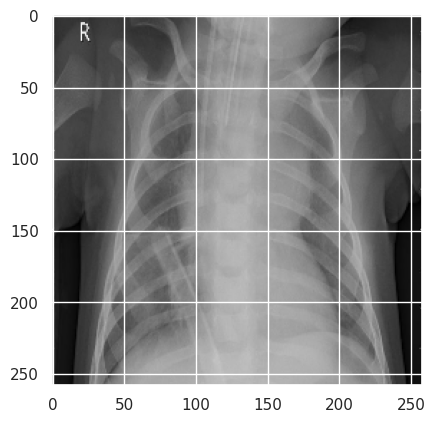

In [9]:
 ind = random.randint(0,len(x_train))
plt.imshow(x_train[ind, :])
plt.show()

In [10]:

os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
model=Sequential() #Layer by layer NN starts here
model.add(Conv2D(32,(2,2),input_shape=(img_size,img_size,3),activation="relu",padding='same',strides=1))
#32 Filters of size 2x2, input shape of the image in given size and grayscale, using relu activation function, stride is the step size
model.add(MaxPooling2D())
#Pooling and decreasing of the dimensions
model.add(Conv2D(64,(2,2),strides=2,activation="relu",padding="same"))
#64 filters and larger strides of 2
model.add(MaxPooling2D())
model.add(Conv2D(128,(2,2), strides=1,activation="relu",padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
#Flattens the previous layer, converting the multi-dimentional image to a complete single-dimension
model.add(Dense(128,activation="relu"))
#Fully connected network with 128 neurons
model.add(Dense(1,activation='sigmoid'))
#Final output layer with only one neuron, satisfying our need of classifying binary

In [11]:
model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(x_train,y_train,epochs=15,batch_size=64)

Epoch 1/15
82/82 [==============================] - 147s 2s/step - loss: 0.2888 - accuracy: 0.8777
Epoch 2/15
82/82 [==============================] - 144s 2s/step - loss: 0.1181 - accuracy: 0.9567
Epoch 3/15
82/82 [==============================] - 144s 2s/step - loss: 0.0936 - accuracy: 0.9688
Epoch 4/15
82/82 [==============================] - 142s 2s/step - loss: 0.0688 - accuracy: 0.9760
Epoch 5/15
82/82 [==============================] - 163s 2s/step - loss: 0.0551 - accuracy: 0.9808
Epoch 6/15
82/82 [==============================] - 143s 2s/step - loss: 0.0484 - accuracy: 0.9820
Epoch 7/15
82/82 [==============================] - 143s 2s/step - loss: 0.0396 - accuracy: 0.9856
Epoch 8/15
82/82 [==============================] - 146s 2s/step - loss: 0.0338 - accuracy: 0.9870
Epoch 9/15
82/82 [==============================] - 165s 2s/step - loss: 0.0222 - accuracy: 0.9921
Epoch 10/15
82/82 [==============================] - 144s 2s/step - loss: 0.0162 - accuracy: 0.9946
Epoch 11/

In [16]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/15
82/82 [==============================] - 144s 2s/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 2/15
82/82 [==============================] - 147s 2s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 3/15
82/82 [==============================] - 143s 2s/step - loss: 3.3533e-04 - accuracy: 1.0000 - val_loss: 0.0388 - val_accuracy: 1.0000
Epoch 4/15
82/82 [==============================] - 145s 2s/step - loss: 1.7678e-04 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 5/15
82/82 [==============================] - 168s 2s/step - loss: 1.4643e-04 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 6/15
82/82 [==============================] - 146s 2s/step - loss: 1.2612e-04 - accuracy: 1.0000 - val_loss: 0.0361 - val_accuracy: 1.0000
Epoch 7/15
82/82 [==============================] - 146s 2s/step - loss: 1.0420e-04 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 

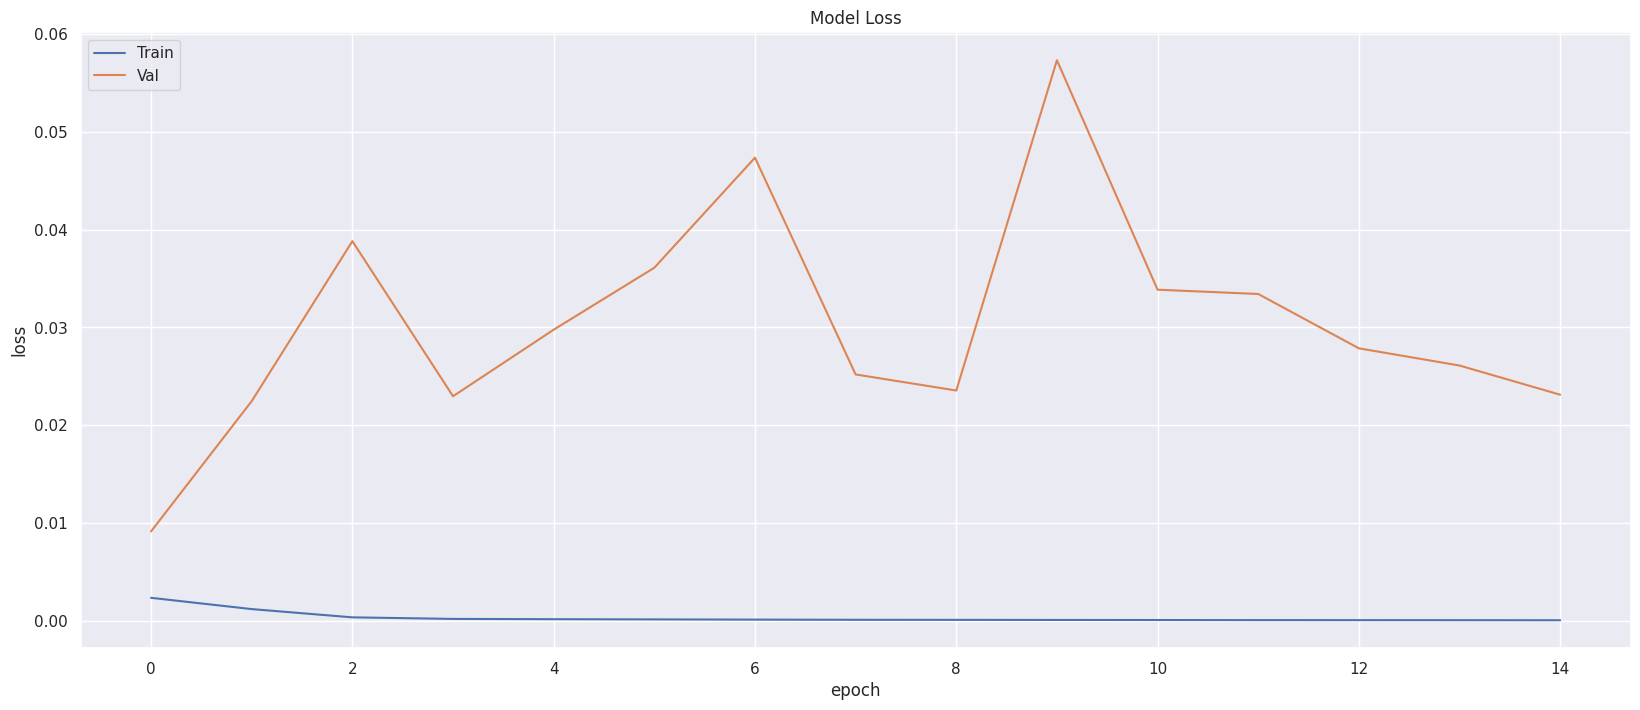

In [17]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
#plot the training loss over every epoch
plt.plot(history.history['val_loss'])
#plot the validation loss
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

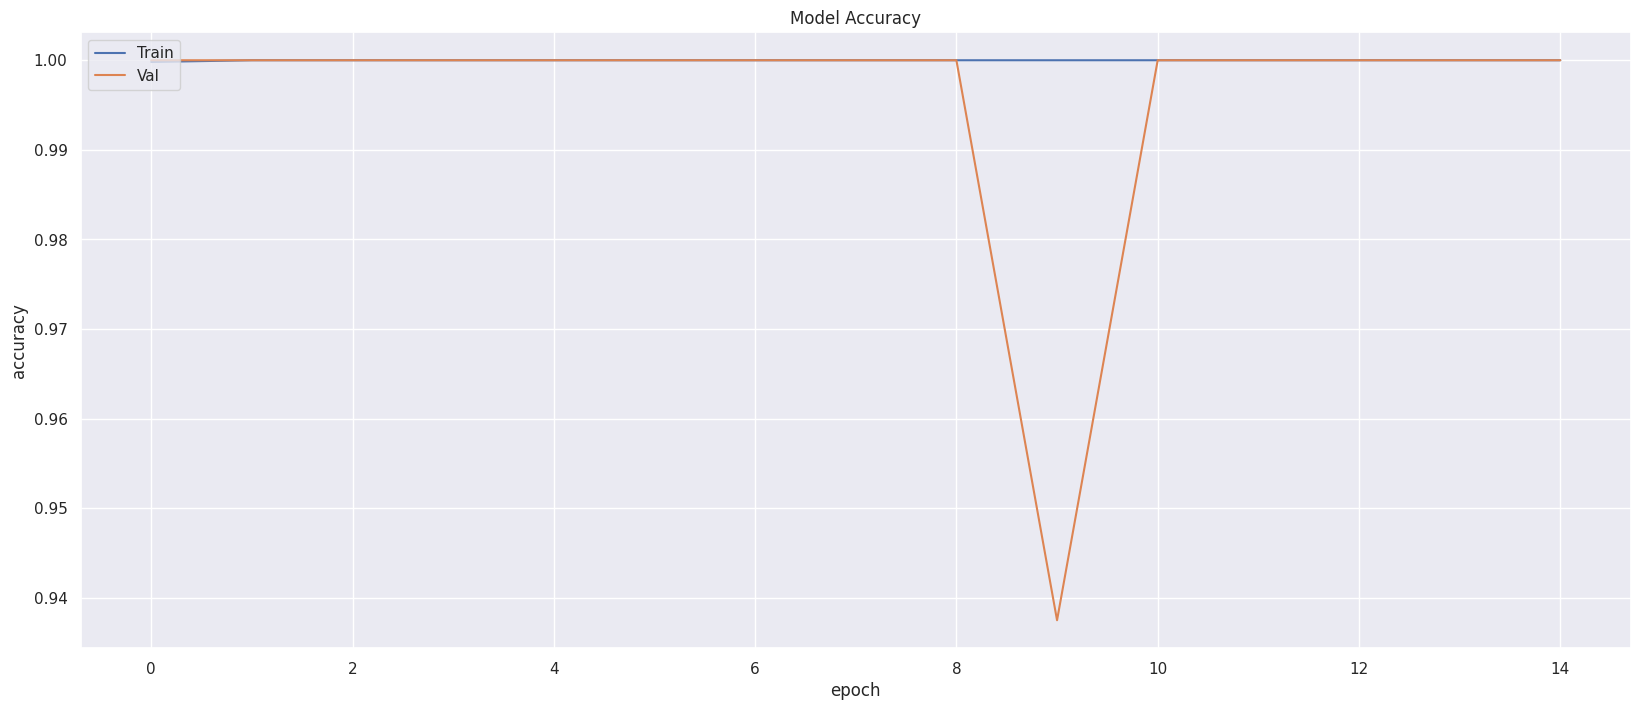

In [20]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
#plot the training accuracy over all the epochs
plt.plot(history.history['val_accuracy'])
#plot the validation accuracy over all the epochs
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [19]:
model.evaluate(x_test,y_test)

20/20 [==============================] - 5s 259ms/step - loss: 3.6939 - accuracy: 0.7340


[3.6939423084259033, 0.7339743375778198]